In [2]:
#!pip install shap

### Libraries

In [4]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

### Basic ML Model

In [5]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

In [9]:
le=LabelEncoder()
df["salary"]=le.fit_transform(df["salary"])
df["sales"]=le.fit_transform(df["sales"])
X=df.drop(columns="left")
y=df["left"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",precision_score(y_test, y_pred))

# Model Recall
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9886666666666667
Precision: 0.9883720930232558
Recall: 0.9631728045325779


#### What is SHAP values?

SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.

Linear models, for example, can use their coefficients as a metric for the overall importance of each feature, but they are scaled with the scale of the variable itself, which might lead to distortions and misinterpretations. Also, the coefficient cannot account for the local importance of the feature, and how it changes with lower or higher values. The same can be said for feature importances of tree-based models, and this is why SHAP is useful for interpretability of models.

In [10]:
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(X_test)

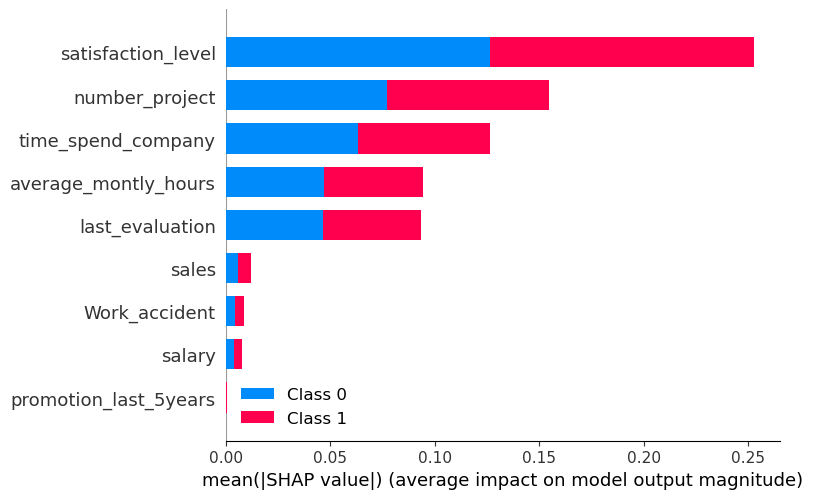

In [11]:
#Create summary plot
shap.summary_plot(shap_values,X_test)

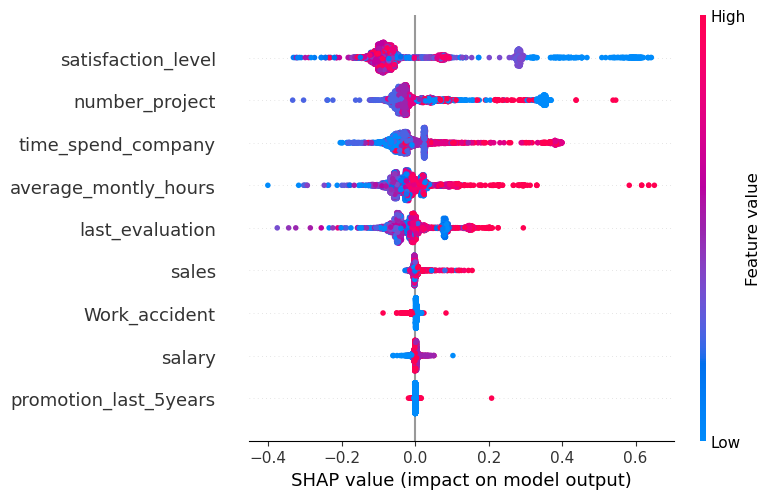

In [42]:
#Dot Plot
shap.summary_plot(shap_values[1],X_test,plot_type="dot")

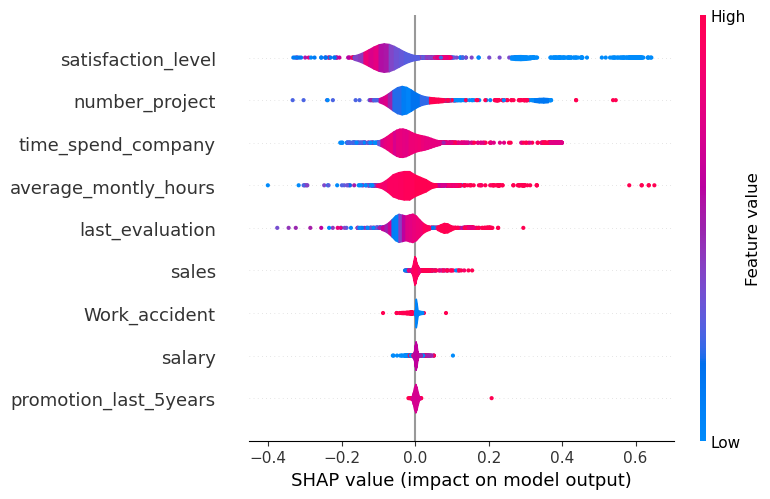

In [49]:
#Violin Plot
shap.summary_plot(shap_values[1],X_test,plot_type="violin")

On the violin the features are also ordered by their effect on prediction, but we can also see how higher and lower values of the feature will affect the result.

All the little dots on the plot represent a single observation. The horizontal axis represents the SHAP value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations.

In this example, time_spend_company and average_monthly_hours have a negative impact on the prediction, while lower values have a positive impact.

In [16]:
#Force Plot
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test)

The force plot is another way to see the effect each feature has on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.

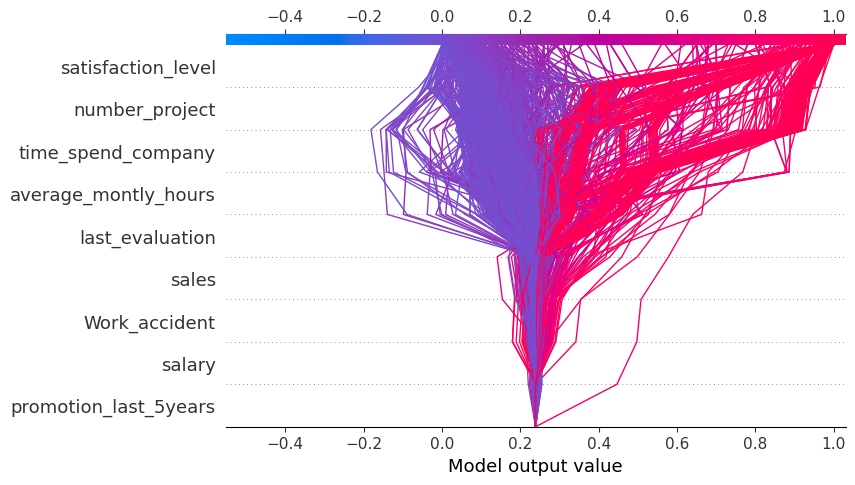

In [54]:
#SHAP Decision Plots
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,ignore_warnings=True)

### When is a decision plot helpful?
There are several use cases for a decision plot. We present several cases here. 1. Show a large number of feature effects clearly. 2. Visualize multioutput predictions. 3. Display the cumulative effect of interactions. 4. Explore feature effects for a range of feature values. 5. Identify outliers. 6. Identify typical prediction paths. 7. Compare and contrast predictions for several models.

In [59]:
#To be continued...